# import libraries

In [1]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
#import requests
import json
#import datetime
import matplotlib.pyplot as plt

# Read the geo json with the geometric shape of the regions

In [2]:
# file name, for all the municipalities in Mexico
file_path_geo_json_mx_clean = 'todos_mun_mx_Clean.json'

# read
with open(file_path_geo_json_mx_clean, 'r') as f:
    geo_json_mx = json.load(f)

# Read CSV with municipality data

In [3]:
# read new csv with municipalities
df_mx = pd.read_csv('datos_municipios.csv')

# convert municipality code to string
df_mx[['Code']] = df_mx[['Code']].astype(str)

# add zeros to the left if necessary
# it is important to distinguish between apply and apply map
df_mx[['Code']] = df_mx[['Code']].applymap(
    lambda x: ((5-len(x))*'0')+x
)

# convert state code code to string
df_mx[['State Code']] = df_mx[['State Code']].astype(str)

# add zeros to the left if necessary
# it is important to distinguish between apply and apply map
df_mx[['State Code']] = df_mx[['State Code']].applymap(
    lambda x: ((2-len(x))*'0')+x
)

# set 'Code' as the index of the dataframe
df_mx.set_index('Code',inplace=True)

In [4]:
df_mx.tail(10)

,Municipality,People,Males,Females,Asymmetry,State Code
Code,,,,,,
04004,Champotón,83021,41760,41261,0.006011,04
23004,Othón P. Blanco,244553,121906,122647,-0.003030,23
23005,Benito Juárez,661176,334945,326231,0.013180,23
23006,José María Morelos,36179,18506,17673,0.023024,23
23008,Solidaridad,159310,83468,75842,0.047869,23
23009,Tulum,28263,14714,13549,0.041220,23
23002,Felipe Carrillo Puerto,75026,37994,37032,0.012822,23
23001,Cozumel,79535,40357,39178,0.014824,23
23007,Lázaro Cárdenas,25333,12972,12361,0.024119,23


In [5]:
print(df_mx.shape)
print(df_mx.dtypes)
#list(df_mx.index.values)

(2436, 6)
Municipality     object
People            int64
Males             int64
Females           int64
Asymmetry       float64
State Code       object
dtype: object


# Add geographical coordinates (LUEGO)

In [6]:
len(geo_json_mx['features'])

2436

In [7]:
# dataframe from the geo json 
# https://stackoverflow.com/questions/41168558/python-how-to-convert-json-file-to-dataframe/41168691
# df_geo_mx = pd.DataFrame.from_dict(geo_json_mx['features'], orient='columns')
df_geo_mx = pd.DataFrame.from_dict(json_normalize(geo_json_mx['features']), orient='columns')

# Scatterplot

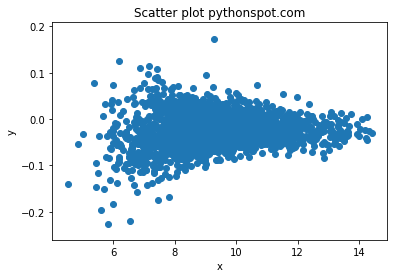

In [8]:
plt.scatter( np.log(df_mx['People']), df_mx['Asymmetry'])
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()